In [13]:
import os
from tqdm import tqdm

In [14]:
dir = 'letter/'

In [15]:
labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
train_images = [dir+i for i in os.listdir(dir)]
train_set = []
for i in train_images:
    if i!='letter/.DS_Store':
        train_set.append([i+'/'+j for j in os.listdir(i)])

In [16]:
import cv2

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [18]:
len(train_set)

26

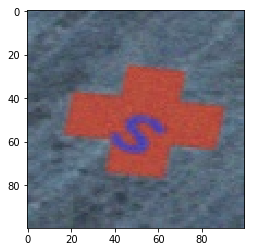

In [19]:
img = cv2.imread(train_set[7][45])
image = plt.imshow(img)

In [20]:
label = []
train = np.hstack(train_set)
#train = np.delete(train,np.where(train=="letter/A/.DS_Store"))
print(train.shape)

(23400,)


In [21]:
for i in range(len(train)):
    for j in labels:
        if j==train[i][7]:
            label.append(j)

In [22]:
label = np.asarray(label)

In [23]:
print(label.shape)

(23400,)


In [24]:
X = []
Y = []
for i in train:
    img = cv2.imread(i)
    if img is not None:
        X.append(img)
    else:
        print(i)
X = np.array(X)
Y = np.array(label)

In [25]:
print(X.shape)
print(Y.shape)

(23400, 100, 100, 3)
(23400,)


In [26]:
y = [] #train_labels
for i in Y:
    for j in labels:
        if i==j:
            y.append(labels.index(j))
Y = np.array(y)

In [27]:
print(Y.shape)
print(Y[1])

(23400,)
17


In [28]:
X = X/255.0

In [29]:
from sklearn.utils import shuffle
X, Y = shuffle(X, Y)

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X,Y, test_size=0.2, random_state=1)

In [31]:
from keras.utils import to_categorical
Y_val = to_categorical(Y_val)
Y_train = to_categorical(Y_train)

Using TensorFlow backend.


In [32]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator

In [33]:
datagen = ImageDataGenerator(
    rotation_range=360,
    horizontal_flip=True)

In [34]:
datagen.fit(X_train)

In [35]:
model = Sequential()

model.add(Conv2D(32, (3,3), input_shape = (100, 100, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(26, activation = 'sigmoid'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 49, 49, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 49, 49, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 76832)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 26)                1997658   
Total params: 1,998,554
Trainable params: 1,998,554
Non-trainable params: 0
_________________________________________________________________


In [36]:
model.fit_generator(datagen.flow(X_train, Y_train, batch_size=32),
                    steps_per_epoch=len(X_train) / 32, epochs=10)

Epoch 1/10
585/585 [==============================] - 215s 367ms/step - loss: 3.2869 - acc: 0.0372
Epoch 2/10
585/585 [==============================] - 206s 352ms/step - loss: 3.2590 - acc: 0.0401
Epoch 3/10
585/585 [==============================] - 182s 312ms/step - loss: 3.2583 - acc: 0.0446
Epoch 4/10
585/585 [==============================] - 179s 306ms/step - loss: 3.2571 - acc: 0.0454
Epoch 5/10
585/585 [==============================] - 211s 360ms/step - loss: 3.2546 - acc: 0.0460
Epoch 6/10
585/585 [==============================] - 184s 315ms/step - loss: 3.2539 - acc: 0.0491
Epoch 7/10
585/585 [==============================] - 180s 308ms/step - loss: nan - acc: 0.0440
Epoch 8/10
 16/585 [..............................] - ETA: 2:57 - loss: nan - acc: 0.0273

KeyboardInterrupt: 

In [ ]:
#model.fit(X_train, Y_train, epochs = 10, verbose = 1)

In [ ]:
model.save_weights('letter_detect_model_weights_4-4-2019-5.h5')
model.save('letter_detect_model_keras_4-5-2019-5.h5')

In [ ]:
model.evaluate(X_val, Y_val, batch_size=32)

In [ ]:
Y_pred = model.predict_classes(X_val)